- Bagging: Bootstrap Aggregation
    - one algorithm
    - Different subsets of the training set
- Uses a technique known as the bootstrap
- Reduces variance of individual models in the ensemble

### Import modules

In [49]:
# Manipulation
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Selection
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import mean_squared_error as MSE
# Models
from sklearn.tree import DecisionTreeRegressor
# Ensemble
from sklearn.ensemble import RandomForestRegressor

### Load data

In [43]:
# Set seed for reproducibility
SEED=1

# read csv into df
df = pd.read_csv('auto.csv')
df = pd.get_dummies(df, columns=["origin"])

# Get features of interest and target labels
X = df.iloc[:,1:]
y = df.iloc[:, 0]

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=SEED)

### Train Random Forest regressor

In [44]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=SEED)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

### Evaluate Random Forest regressor

In [47]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


In [53]:
# Test result with a single decision tree
dt = DecisionTreeRegressor(random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rmse_test_dt = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of single decision tree: {:.2f}'.format(rmse_test_dt))

Test set RMSE of single decision tree: 4.61


The test set RMSE achieved by rf is significantly smaller than that achieved by a single tree!

### Visualizing features importances

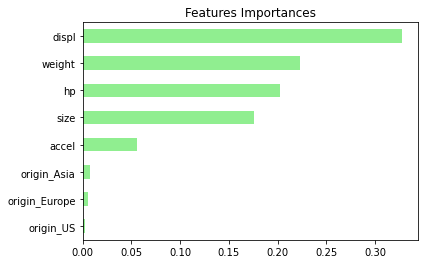

In [54]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()